In [ ]:
#data path  "C:\Users\prahlad punia\Desktop\ashutosh_intelipaat\insurance.csv"

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [200]:
df=pd.read_csv(r"C:\Users\prahlad punia\Desktop\ashutosh_intelipaat\drug200.csv")

In [201]:
df.shape

(200, 6)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [203]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [204]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [205]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [212]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [206]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [215]:
df["BP"].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [217]:
df["Sex"].unique()

array(['F', 'M'], dtype=object)

In [218]:
df["Cholesterol"].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [219]:
df["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [211]:
df["Age"]

0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64

In [214]:
df[['Age','Na_to_K']]

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


In [ ]:
#  df1=df.drop('age', axis=1)  for rows df1=df.drop(0, axis=0)

In [221]:
df['Age'].max()

74

In [224]:
df[['Age', 'Na_to_K']].cov()

,Age,Na_to_K
Age,273.714347,-7.543752
Na_to_K,-7.543752,52.185533


In [ ]:
a=["Age", "Na_toK"] # Continous variables
b= ["'Sex", 'BP', 'Cholesterol',"Drug"] # Categorical variables

In [236]:
#UNIVARIATE ANALYSIS

M    104
F     96
Name: Sex, dtype: int64


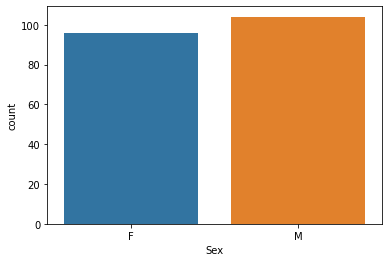

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


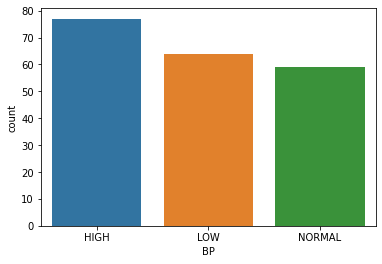

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


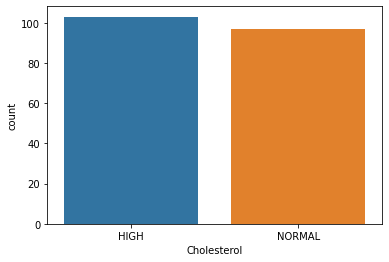

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64


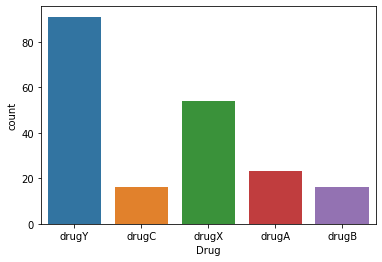

In [235]:
# For categorical variables we can plot a frequency graph (nos or counts)
for i in b:
    print(df[i].value_counts())  # This will print the count nos 
    sns.countplot(x=i, data=df)
    plt.show()

In [237]:
#Check the distribution of Continous variables by histogram

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64


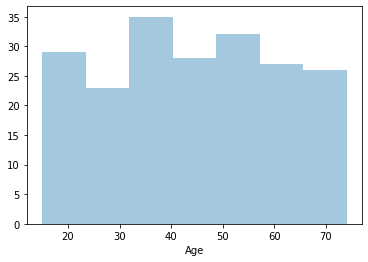

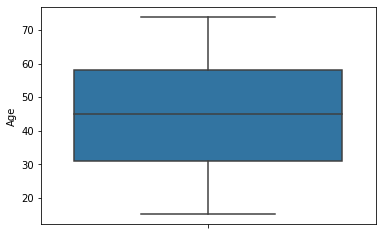

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64


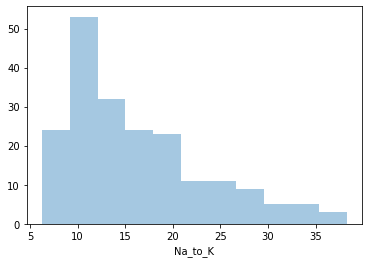

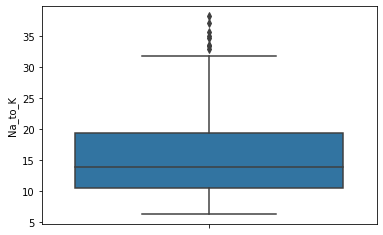

In [241]:
for i in a:
    print(df[i].describe())
    sns.distplot(df[i], kde=False)
    plt.show()
    sns.boxplot(y=i, data=df)
    plt.show()

In [244]:
#outliers  Q1-1.5IQR or Q3+1.5IQR  IQR=Q3-Q1
#Outliers in Na_to_K
df[df["Na_to_K"]>32.5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
24,33,F,LOW,HIGH,33.486,drugY
96,58,F,LOW,HIGH,38.247,drugY
98,20,M,HIGH,NORMAL,35.639,drugY
128,47,M,LOW,NORMAL,33.542,drugY
131,52,M,LOW,NORMAL,32.922,drugY
184,18,F,HIGH,HIGH,37.188,drugY
188,65,M,HIGH,NORMAL,34.997,drugY
194,46,F,HIGH,HIGH,34.686,drugY


In [245]:
#BIVARIATE ANALYSIS
#One variable will be Drug - dependent variable
#Other variables we can take one by one 


#CATEGORICAL V/S CONTINUOUS    
  We can use box plot, swarm plot or even dist plot. Here we will use box and swarm plot

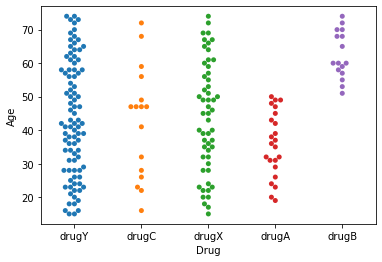

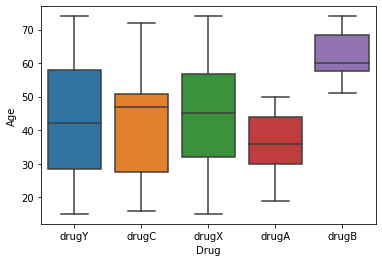

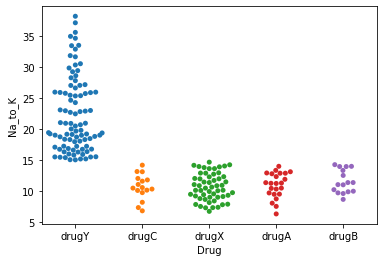

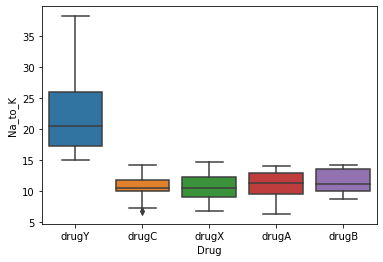

In [248]:
for i in a:
    sns.swarmplot(x="Drug", y=i, data=df)
    plt.show()
    sns.boxplot(x="Drug", y=i, data=df)
    plt.show()

#Here we can use crosstab also

In [250]:
w= pd.crosstab(df["Sex"], df["Drug"], margins=True)
print(w)

Drug  drugA  drugB  drugC  drugX  drugY  All
Sex                                         
F         9      6      7     27     47   96
M        14     10      9     27     44  104
All      23     16     16     54     91  200


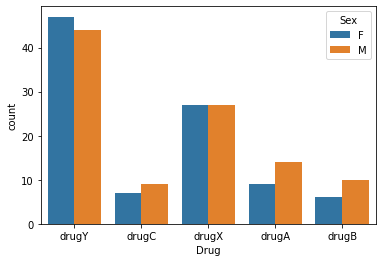

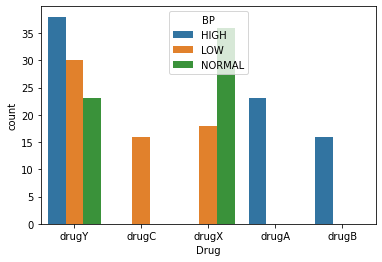

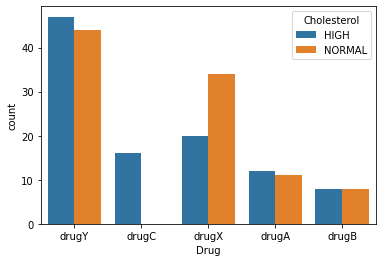

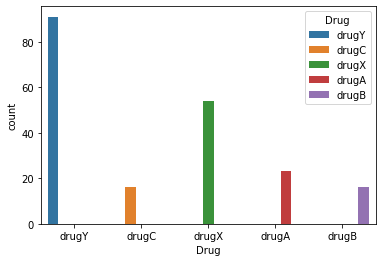

In [260]:
#We can also use the count plot 
for i in b:
    sns.countplot(x="Drug",hue=i,  data=df)
    plt.show()

# MULTIVARIATE ANALYSIS
#one variable will be Drug(dependent variable) and take any two three variables

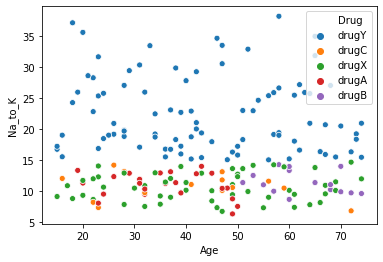

In [261]:
sns.scatterplot(x="Age", y="Na_to_K", hue="Drug", data=df)
plt.show()

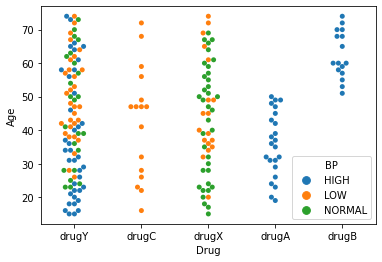

In [262]:
sns.swarmplot(x="Drug", y="Age", hue="BP", data=df)

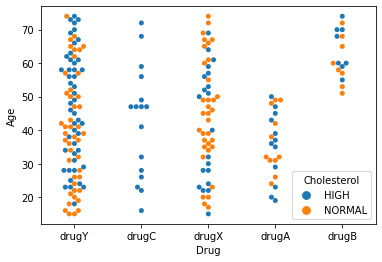

In [263]:
sns.swarmplot(x="Drug", y="Age", hue="Cholesterol", data=df)

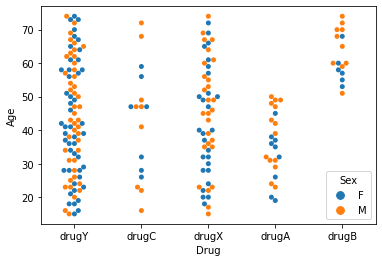

In [264]:
sns.swarmplot(x="Drug", y="Age", hue="Sex", data=df)

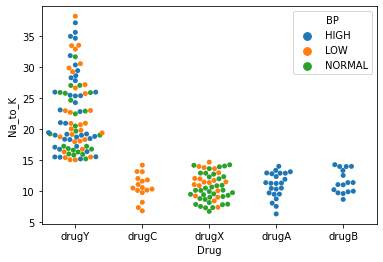

In [265]:
sns.swarmplot(x="Drug", y="Na_to_K", hue="BP", data=df)

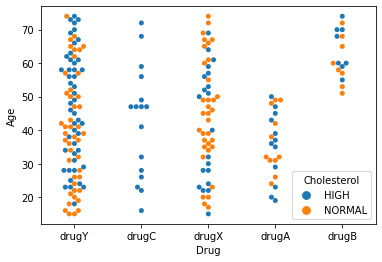

In [266]:
sns.swarmplot(x="Drug", y="Age", hue="Cholesterol", data=df)

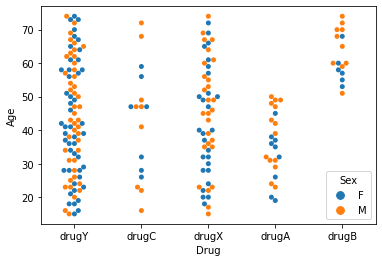

In [267]:
sns.swarmplot(x="Drug", y="Age", hue="Sex", data=df)

drug y == all age groups for Na_to_K >15   
drug a == for high BP  age <50    
drug b== for high BP age >50
drug c== for high Cholesterol and low BP for all age gps and Na_to_K <15
drug x== for LOW and NORMAL BP but Na_to_K<15 used for all age groups